In [109]:
import numpy as np
import torch

In [110]:
thetas_posterior_a = np.load('thetas_posterior_1a.npy')

In [111]:
thetas_posterior_b = np.load('thetas_posterior_1b.npy')

(array([  3317.,  89217., 197723., 134685.,  82236.,  85753., 147498.,
        194025.,  64088.,   1458.]),
 array([-2.4020255 , -1.9141203 , -1.4262153 , -0.93831015, -0.45040506,
         0.03750002,  0.5254051 ,  1.0133102 ,  1.5012153 ,  1.9891204 ,
         2.4770255 ], dtype=float32),
 <a list of 10 Patch objects>)

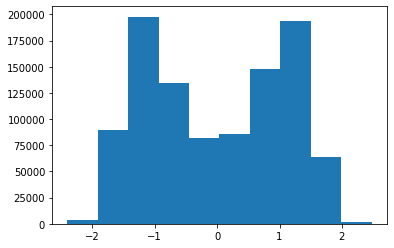

In [112]:
import matplotlib.pyplot as plt
plt.hist(thetas_posterior_a)

(array([5.68000e+02, 1.53030e+04, 8.60500e+04, 1.85798e+05, 2.38149e+05,
        2.31873e+05, 1.67053e+05, 6.62840e+04, 8.70700e+03, 2.15000e+02]),
 array([-2.7491107 , -2.1873705 , -1.6256303 , -1.0638901 , -0.5021499 ,
         0.05959034,  0.62133056,  1.1830708 ,  1.7448109 ,  2.3065512 ,
         2.8682914 ], dtype=float32),
 <a list of 10 Patch objects>)

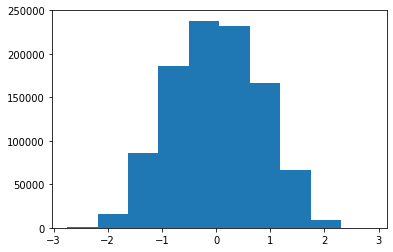

In [113]:
import matplotlib.pyplot as plt
plt.hist(thetas_posterior_b)

In [114]:
observations = np.load("obs1a.npy")
observations_tensor = torch.Tensor(observations)

In [115]:
from torch.distributions.normal import Normal

def log_likelihood(mean, observations, sigma=1):
    return Normal(mean, sigma).log_prob(observations).sum(dim=1)

In [116]:
thetas_all = np.vstack([thetas_posterior_a, thetas_posterior_b])

In [117]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [120]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [121]:
lls_a = log_likelihood(-thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=1)
lls_a = lls_a.cpu().numpy()

In [124]:
lls_b = log_likelihood(thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=2)
lls_b = lls_b.cpu().numpy()

In [135]:
N = thetas_posterior_a.shape[0]
def nll(logB):
    part1 = np.log(1.+np.exp(lls_b[:N] - lls_a[:N] + logB)).mean()
    part2 = np.log(1.+np.exp(lls_a[N:] - lls_b[N:] - logB)).mean()
    return part1 + part2

In [141]:
from scipy import optimize
np.seterr('raise')
result = optimize.minimize_scalar(nll)

In [142]:
result.success

True

In [143]:
result.x

0.9680549897600299